In [54]:
import numpy as np
import os
import pandas as pd
from corm import model
from helper_fxns import gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, create_logp_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.tri as tri

In [4]:
os.chdir('/Users/Erin/git/accre_data_analysis/corm/correct')

In [6]:
traces = {}
traces['a'] = np.load('corm_dreamzs_5chain_redo_sampled_params_chain_0.npy')
traces['a'] = [traces['a']]
for chain in range(1, 3):
    traces['a'].append(np.load('corm_dreamzs_5chain_redo_sampled_params_chain_'+str(chain)+'.npy'))      

In [7]:
logps = {}
logps['a'] = np.load('corm_dreamzs_5chain_redo_logps_chain_0.npy')
logps['a'] = [logps['a']]
for chain in range(1, 3):
    logps['a'].append(np.load('corm_dreamzs_5chain_redo_logps_chain_'+str(chain)+'.npy'))      

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2']
for run in ['a']:
    for i, param in enumerate(param_trace_dict_a['param_list']):
        param_trace_dict_a[param] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2']

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  12  of  12  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  12  of  12  parameters.
Percent of parameters with GR below 1.1:  100.0


[12, 100.0, 12, 100.0]

100000
3
100000


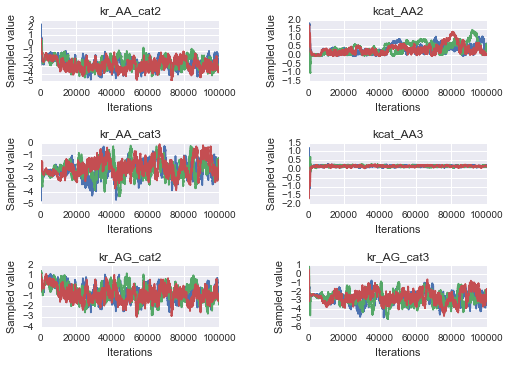

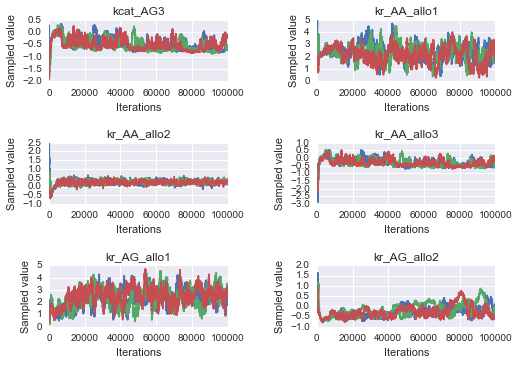

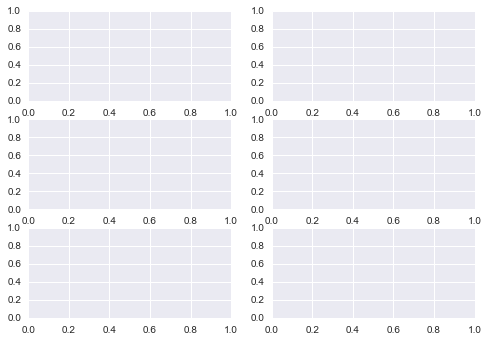

In [10]:
sample_plots(param_trace_dicts['a'])

In [11]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=15000, thin=1)
logp_arr_a = create_logp_matrix(logps['a'], burnin=15000, thin=1)

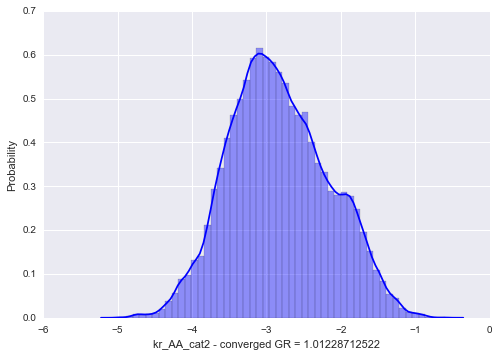

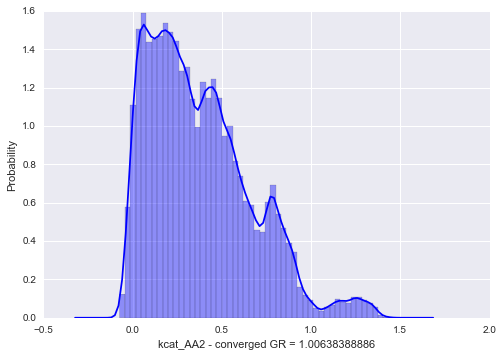

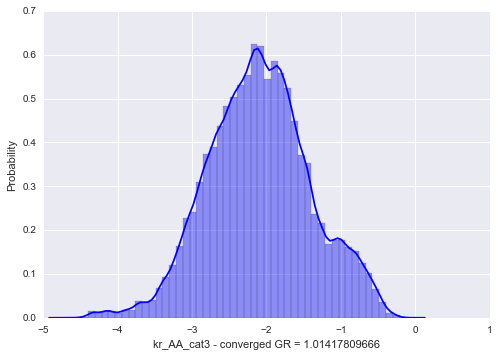

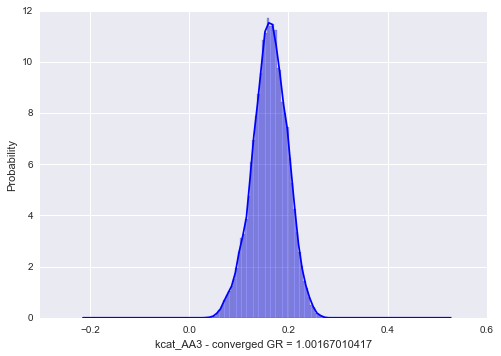

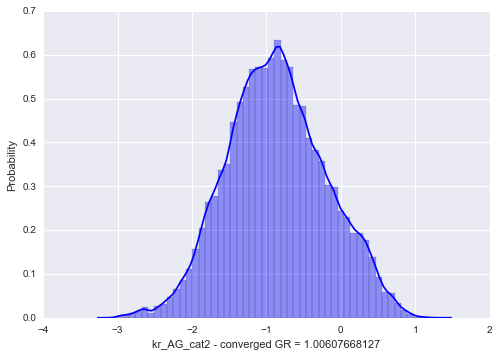

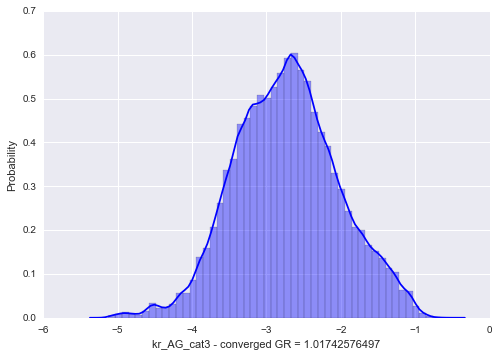

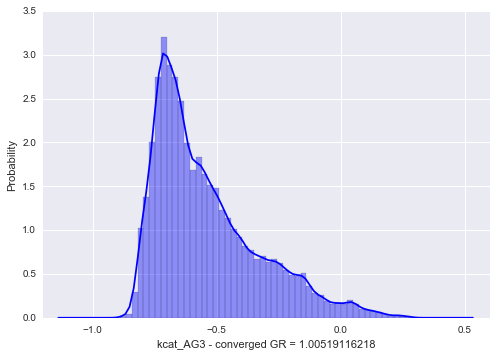

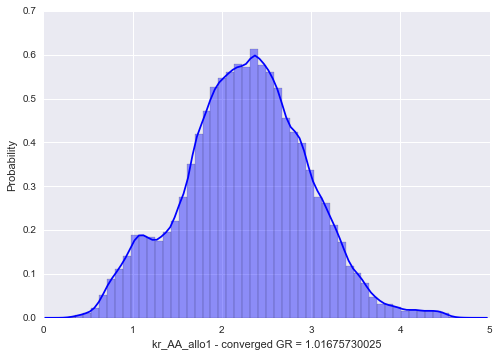

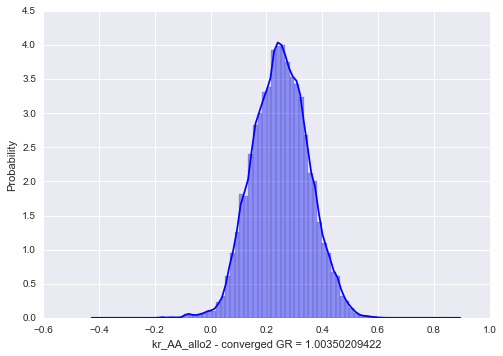

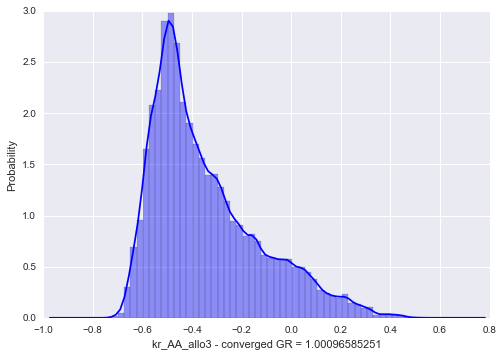

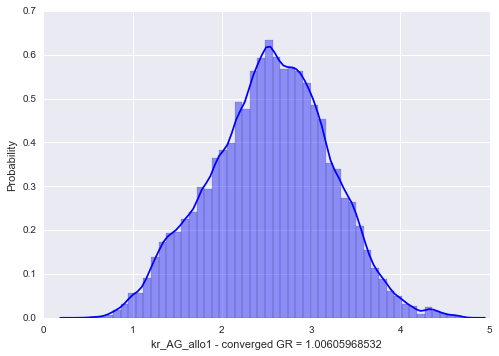

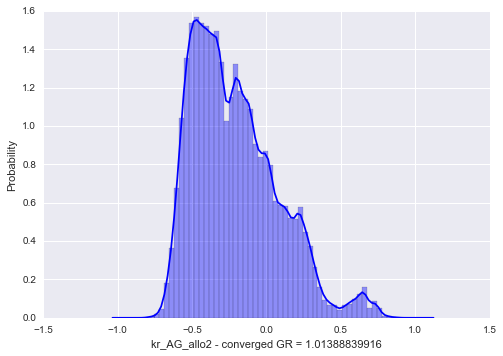

In [12]:
sampled_param_names = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2']
for dim, param_name in enumerate(sampled_param_names):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [13]:
acceptance_rates = {}
vector_acceptance_rate = {}
running_acceptance_rates = {}
running_acceptance_rates_100window = {}
n_vector_acceptances = {}
n_100windowvec_acceptances = {}
running_acceptance_rates_vec = {}
running_acceptances_rates_vec_100window = {}
n_100window_acceptances = {}
n_acceptances = {}
for run in ['a']:
    acceptance_rates[run] = {}
    vector_acceptance_rate[run] = {}
    running_acceptance_rates[run] = {}
    running_acceptance_rates_100window[run] = {}
    n_vector_acceptances[run] = {}
    n_100windowvec_acceptances[run] = {}
    running_acceptance_rates_vec[run] = {}
    running_acceptances_rates_vec_100window[run] = {}
    n_100window_acceptances[run] = {}
    n_acceptances[run] = {}
    for chain in range(len(traces[run])):
        acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0],)))
        vector_acceptance_rate[run][chain] = 0
        running_acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0]), len(traces['a'][0])))
        running_acceptance_rates_100window[run][chain] = np.zeros((len(traces['a'][0][0]), 1000))
        n_vector_acceptances[run][chain] = 0
        n_100windowvec_acceptances[run][chain] = 0
        running_acceptance_rates_vec[run][chain] = np.zeros((1, len(traces['a'][0])))
        running_acceptances_rates_vec_100window[run][chain] = np.zeros((1, 1000))
        n_100window_acceptances[run][chain] = {}
        n_acceptances[run][chain] = {}
        for dim in range(len(traces[run][chain][0])):
            n_100window_acceptances[run][chain][dim] = 0
            n_acceptances[run][chain][dim] = 0
            for iteration in range(1, len(traces[run][chain])):
                if dim == 0:
                    comparison = traces[run][chain][iteration] == traces[run][chain][iteration-1]
                    if not np.all(comparison):
                        n_vector_acceptances[run][chain] += 1
                        n_100windowvec_acceptances[run][chain] += 1
                    running_acceptance_rates_vec[run][chain][0, iteration] = float(n_vector_acceptances[run][chain])/iteration
                    if iteration % 100 == 0:
                        running_acceptances_rates_vec_100window[run][chain][0, iteration/100] = float(n_100windowvec_acceptances[run][chain])/100
                        n_100windowvec_acceptances[run][chain] = 0
                if traces[run][chain][iteration][dim] != traces[run][chain][iteration-1][dim]:
                    n_acceptances[run][chain][dim] += 1
                    n_100window_acceptances[run][chain][dim] += 1
                running_acceptance_rates[run][chain][dim, iteration] = float(n_acceptances[run][chain][dim])/iteration
        
                if iteration % 100 == 0:
                    running_acceptance_rates_100window[run][chain][dim, iteration/100] = float(n_100window_acceptances[run][chain][dim])/100
                    n_100window_acceptances[run][chain][dim] = 0
            
            acceptance_rates[run][chain][dim] = float(n_acceptances[run][chain][dim])/len(traces[run][chain])
            print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances[run][chain][dim]),' acceptance rate: ',str(acceptance_rates[run][chain][dim])
        print 'n vector acceptances: ',n_vector_acceptances[run][chain],' for run: ',run,' and chain: ',chain
        print 'Acceptance rate for vector: ',float(n_vector_acceptances[run][chain])/len(traces[run][chain]),' for run: ',run,' and chain: ',chain
running_acceptance_rates
running_acceptance_rates_100window
running_acceptance_rates_vec
running_acceptances_rates_vec_100window


N acceptances for parameter:  kr_AA_cat2  =  15658  acceptance rate:  0.15658
N acceptances for parameter:  kcat_AA2  =  15662  acceptance rate:  0.15662
N acceptances for parameter:  kr_AA_cat3  =  15664  acceptance rate:  0.15664
N acceptances for parameter:  kcat_AA3  =  15662  acceptance rate:  0.15662
N acceptances for parameter:  kr_AG_cat2  =  15667  acceptance rate:  0.15667
N acceptances for parameter:  kr_AG_cat3  =  15670  acceptance rate:  0.1567
N acceptances for parameter:  kcat_AG3  =  15658  acceptance rate:  0.15658
N acceptances for parameter:  kr_AA_allo1  =  15673  acceptance rate:  0.15673
N acceptances for parameter:  kr_AA_allo2  =  15668  acceptance rate:  0.15668
N acceptances for parameter:  kr_AA_allo3  =  15668  acceptance rate:  0.15668
N acceptances for parameter:  kr_AG_allo1  =  15670  acceptance rate:  0.1567
N acceptances for parameter:  kr_AG_allo2  =  15653  acceptance rate:  0.15653
n vector acceptances:  15743  for run:  a  and chain:  0
Acceptance

{'a': {0: array([[ 0.  ,  0.11,  0.19,  0.08,  0.02,  0.05,  0.07,  0.07,  0.08,
           0.06,  0.03,  0.04,  0.03,  0.04,  0.03,  0.04,  0.1 ,  0.07,
           0.09,  0.1 ,  0.12,  0.1 ,  0.1 ,  0.08,  0.06,  0.11,  0.11,
           0.14,  0.13,  0.08,  0.18,  0.09,  0.1 ,  0.14,  0.11,  0.14,
           0.18,  0.15,  0.2 ,  0.14,  0.13,  0.21,  0.21,  0.24,  0.21,
           0.27,  0.14,  0.2 ,  0.19,  0.2 ,  0.19,  0.25,  0.23,  0.26,
           0.2 ,  0.23,  0.2 ,  0.19,  0.25,  0.21,  0.15,  0.24,  0.19,
           0.22,  0.2 ,  0.21,  0.17,  0.16,  0.26,  0.22,  0.27,  0.34,
           0.24,  0.22,  0.19,  0.3 ,  0.24,  0.28,  0.24,  0.26,  0.25,
           0.25,  0.22,  0.17,  0.17,  0.2 ,  0.2 ,  0.21,  0.13,  0.27,
           0.21,  0.17,  0.1 ,  0.17,  0.13,  0.16,  0.18,  0.21,  0.25,
           0.2 ,  0.17,  0.17,  0.16,  0.2 ,  0.2 ,  0.24,  0.16,  0.22,
           0.18,  0.19,  0.18,  0.19,  0.28,  0.3 ,  0.23,  0.26,  0.16,
           0.2 ,  0.21,  0.21,  0.16,  0.18

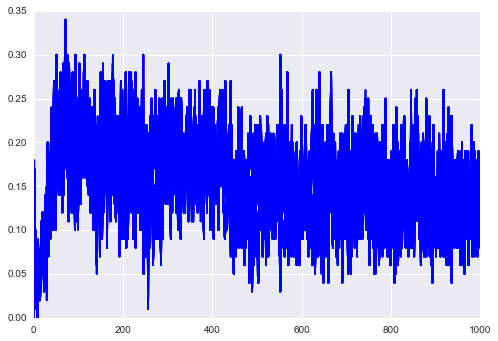

In [14]:
for run in ['a']:
    for chain in range(len(traces[run])):
        for dim in range(12):
            if run == 'a':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'b')

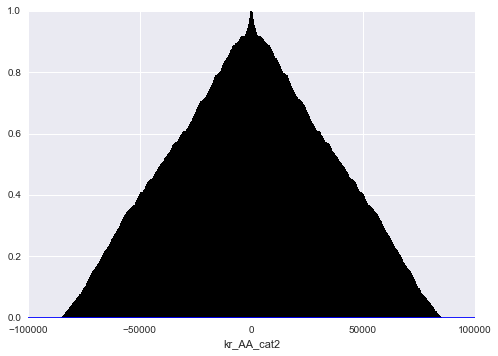

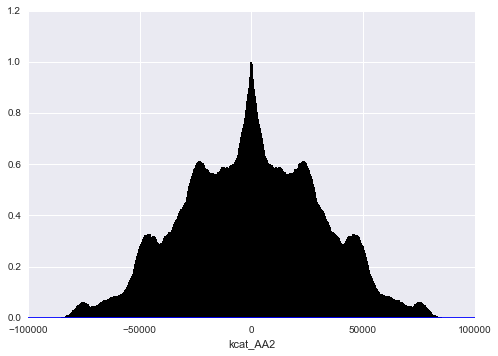

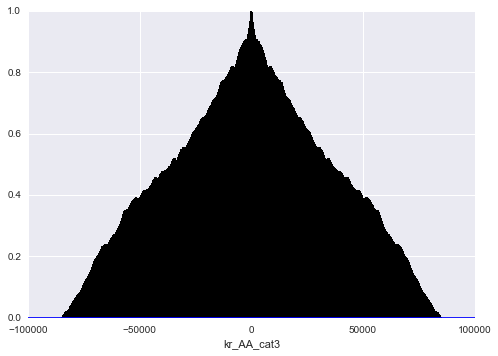

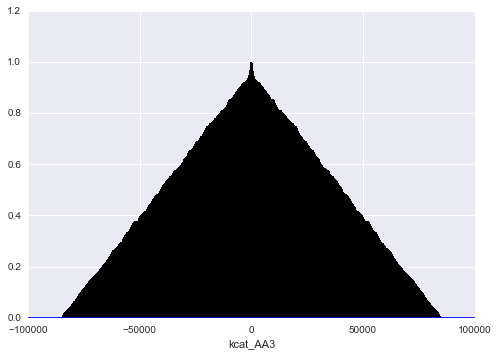

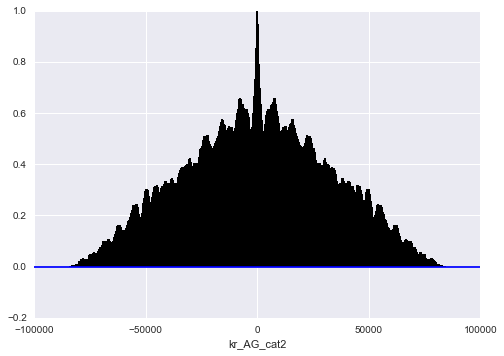

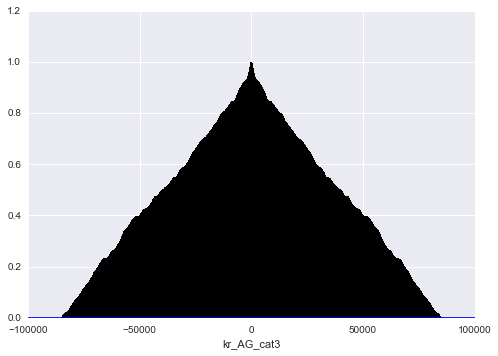

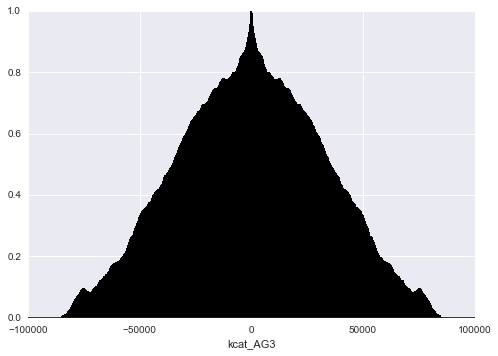

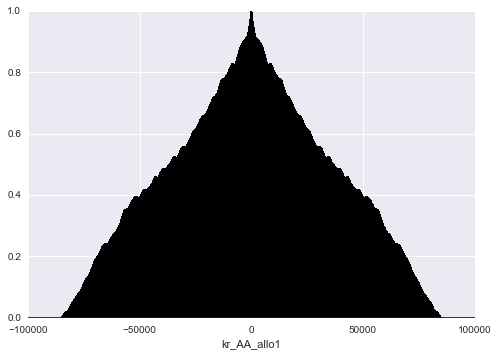

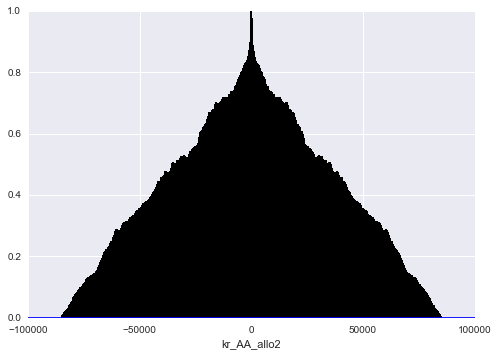

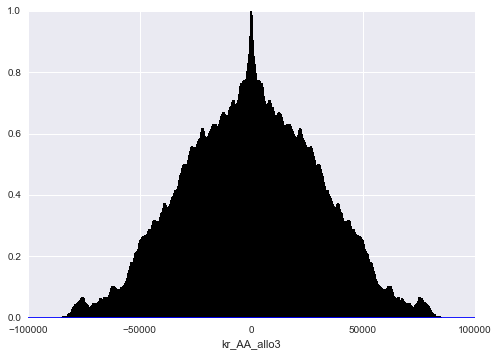

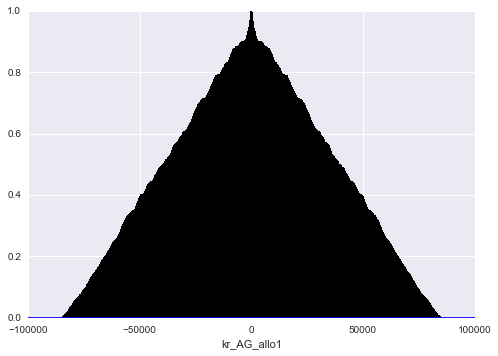

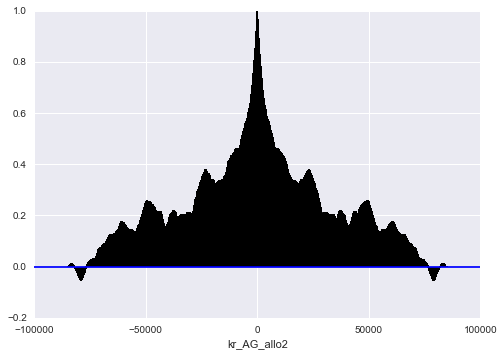

In [15]:
for dim, param_name in enumerate(sampled_param_names):
    fig = plt.figure()
    plt.acorr(traces['a'][0][15000:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [16]:
mcmc_samples = pd.DataFrame(trace_arr_a, columns=sampled_param_names)

In [17]:
mcmc_samples['logp'] = logp_arr_a[:,0]

In [18]:
mcmc_samples_subsampled = mcmc_samples.sample(frac=.10)

In [19]:
mcmc_samples_subsampled.to_csv('CORM_MCMC_samples_for_visualization.csv', index=False)

In [20]:
unique_samples = mcmc_samples.drop_duplicates()

In [21]:
unique_samples

,kr_AA_cat2,kcat_AA2,kr_AA_cat3,kcat_AA3,kr_AG_cat2,kr_AG_cat3,kcat_AG3,kr_AA_allo1,kr_AA_allo2,kr_AA_allo3,kr_AG_allo1,kr_AG_allo2,logp
0,-1.656638,0.420777,-2.069266,0.107489,0.248663,-2.885596,-0.677369,2.349067,0.366187,-0.422109,1.429034,-0.147477,343.664906
3,-1.700117,0.420735,-2.087801,0.106316,0.201243,-2.896330,-0.667925,2.377532,0.377325,-0.404009,1.475672,-0.144609,343.674510
5,-1.687701,0.415927,-2.108872,0.103234,0.230274,-2.898090,-0.653288,2.377806,0.356558,-0.405227,1.447040,-0.160469,343.329398
15,-1.783227,0.422078,-2.159469,0.099800,0.113752,-2.933589,-0.648384,2.439432,0.363943,-0.377933,1.565634,-0.135131,343.001024
19,-1.777824,0.422674,-2.155928,0.099546,0.123827,-2.936660,-0.656578,2.429290,0.356746,-0.392103,1.555715,-0.135131,343.037056
24,-1.775401,0.429044,-2.139574,0.094125,0.131976,-2.937172,-0.685936,2.382898,0.326299,-0.441618,1.547437,-0.141042,341.049682
25,-1.662592,0.389150,-2.122855,0.086899,0.294122,-2.838871,-0.619338,2.331408,0.293612,-0.389946,1.388433,-0.187485,341.687765
26,-1.783429,0.332992,-2.078418,0.137275,0.189676,-2.854521,-0.614953,2.410030,0.408833,-0.325782,1.484206,-0.209626,342.007142
28,-1.738105,0.328287,-2.033798,0.134855,0.232283,-2.805196,-0.611946,2.374785,0.416055,-0.314069,1.442229,-0.207115,341.543070
34,-1.712403,0.334917,-2.017859,0.126778,0.263070,-2.802769,-0.634792,2.353918,0.411481,-0.330319,1.415000,-0.208890,342.349679


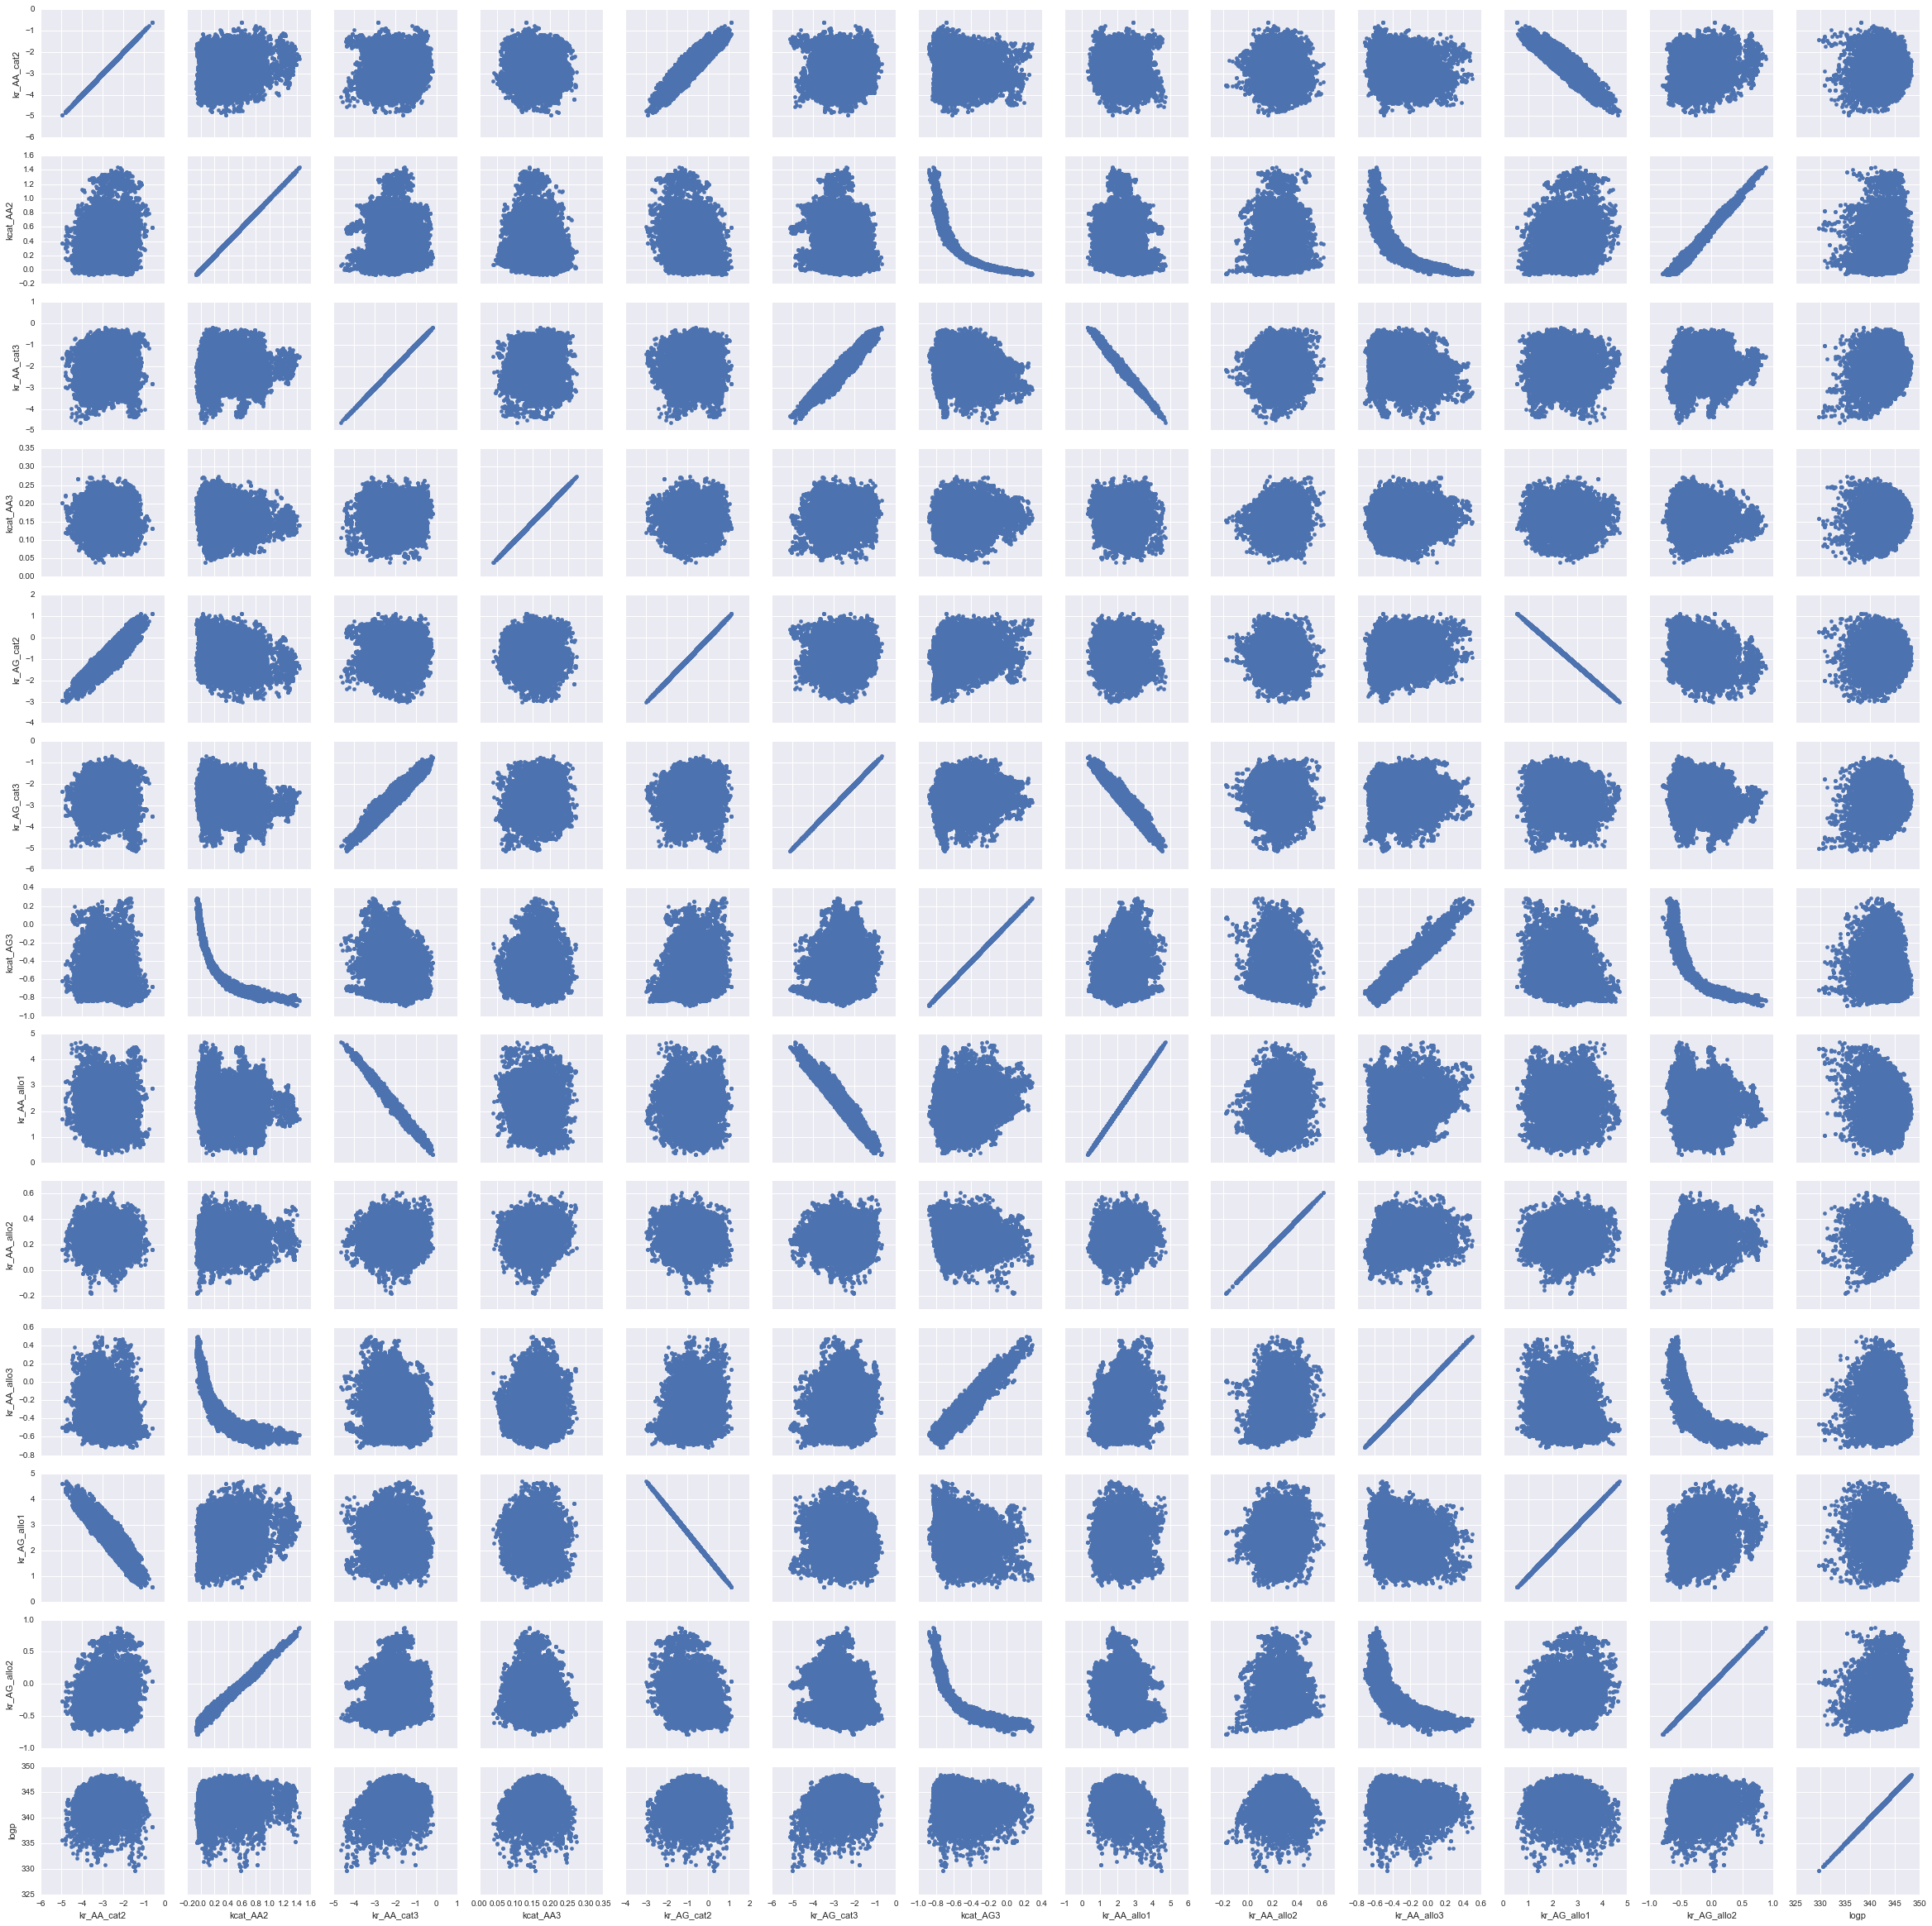

In [22]:
g = sns.PairGrid(mcmc_samples.sample(frac=.10))
g.map(plt.scatter)

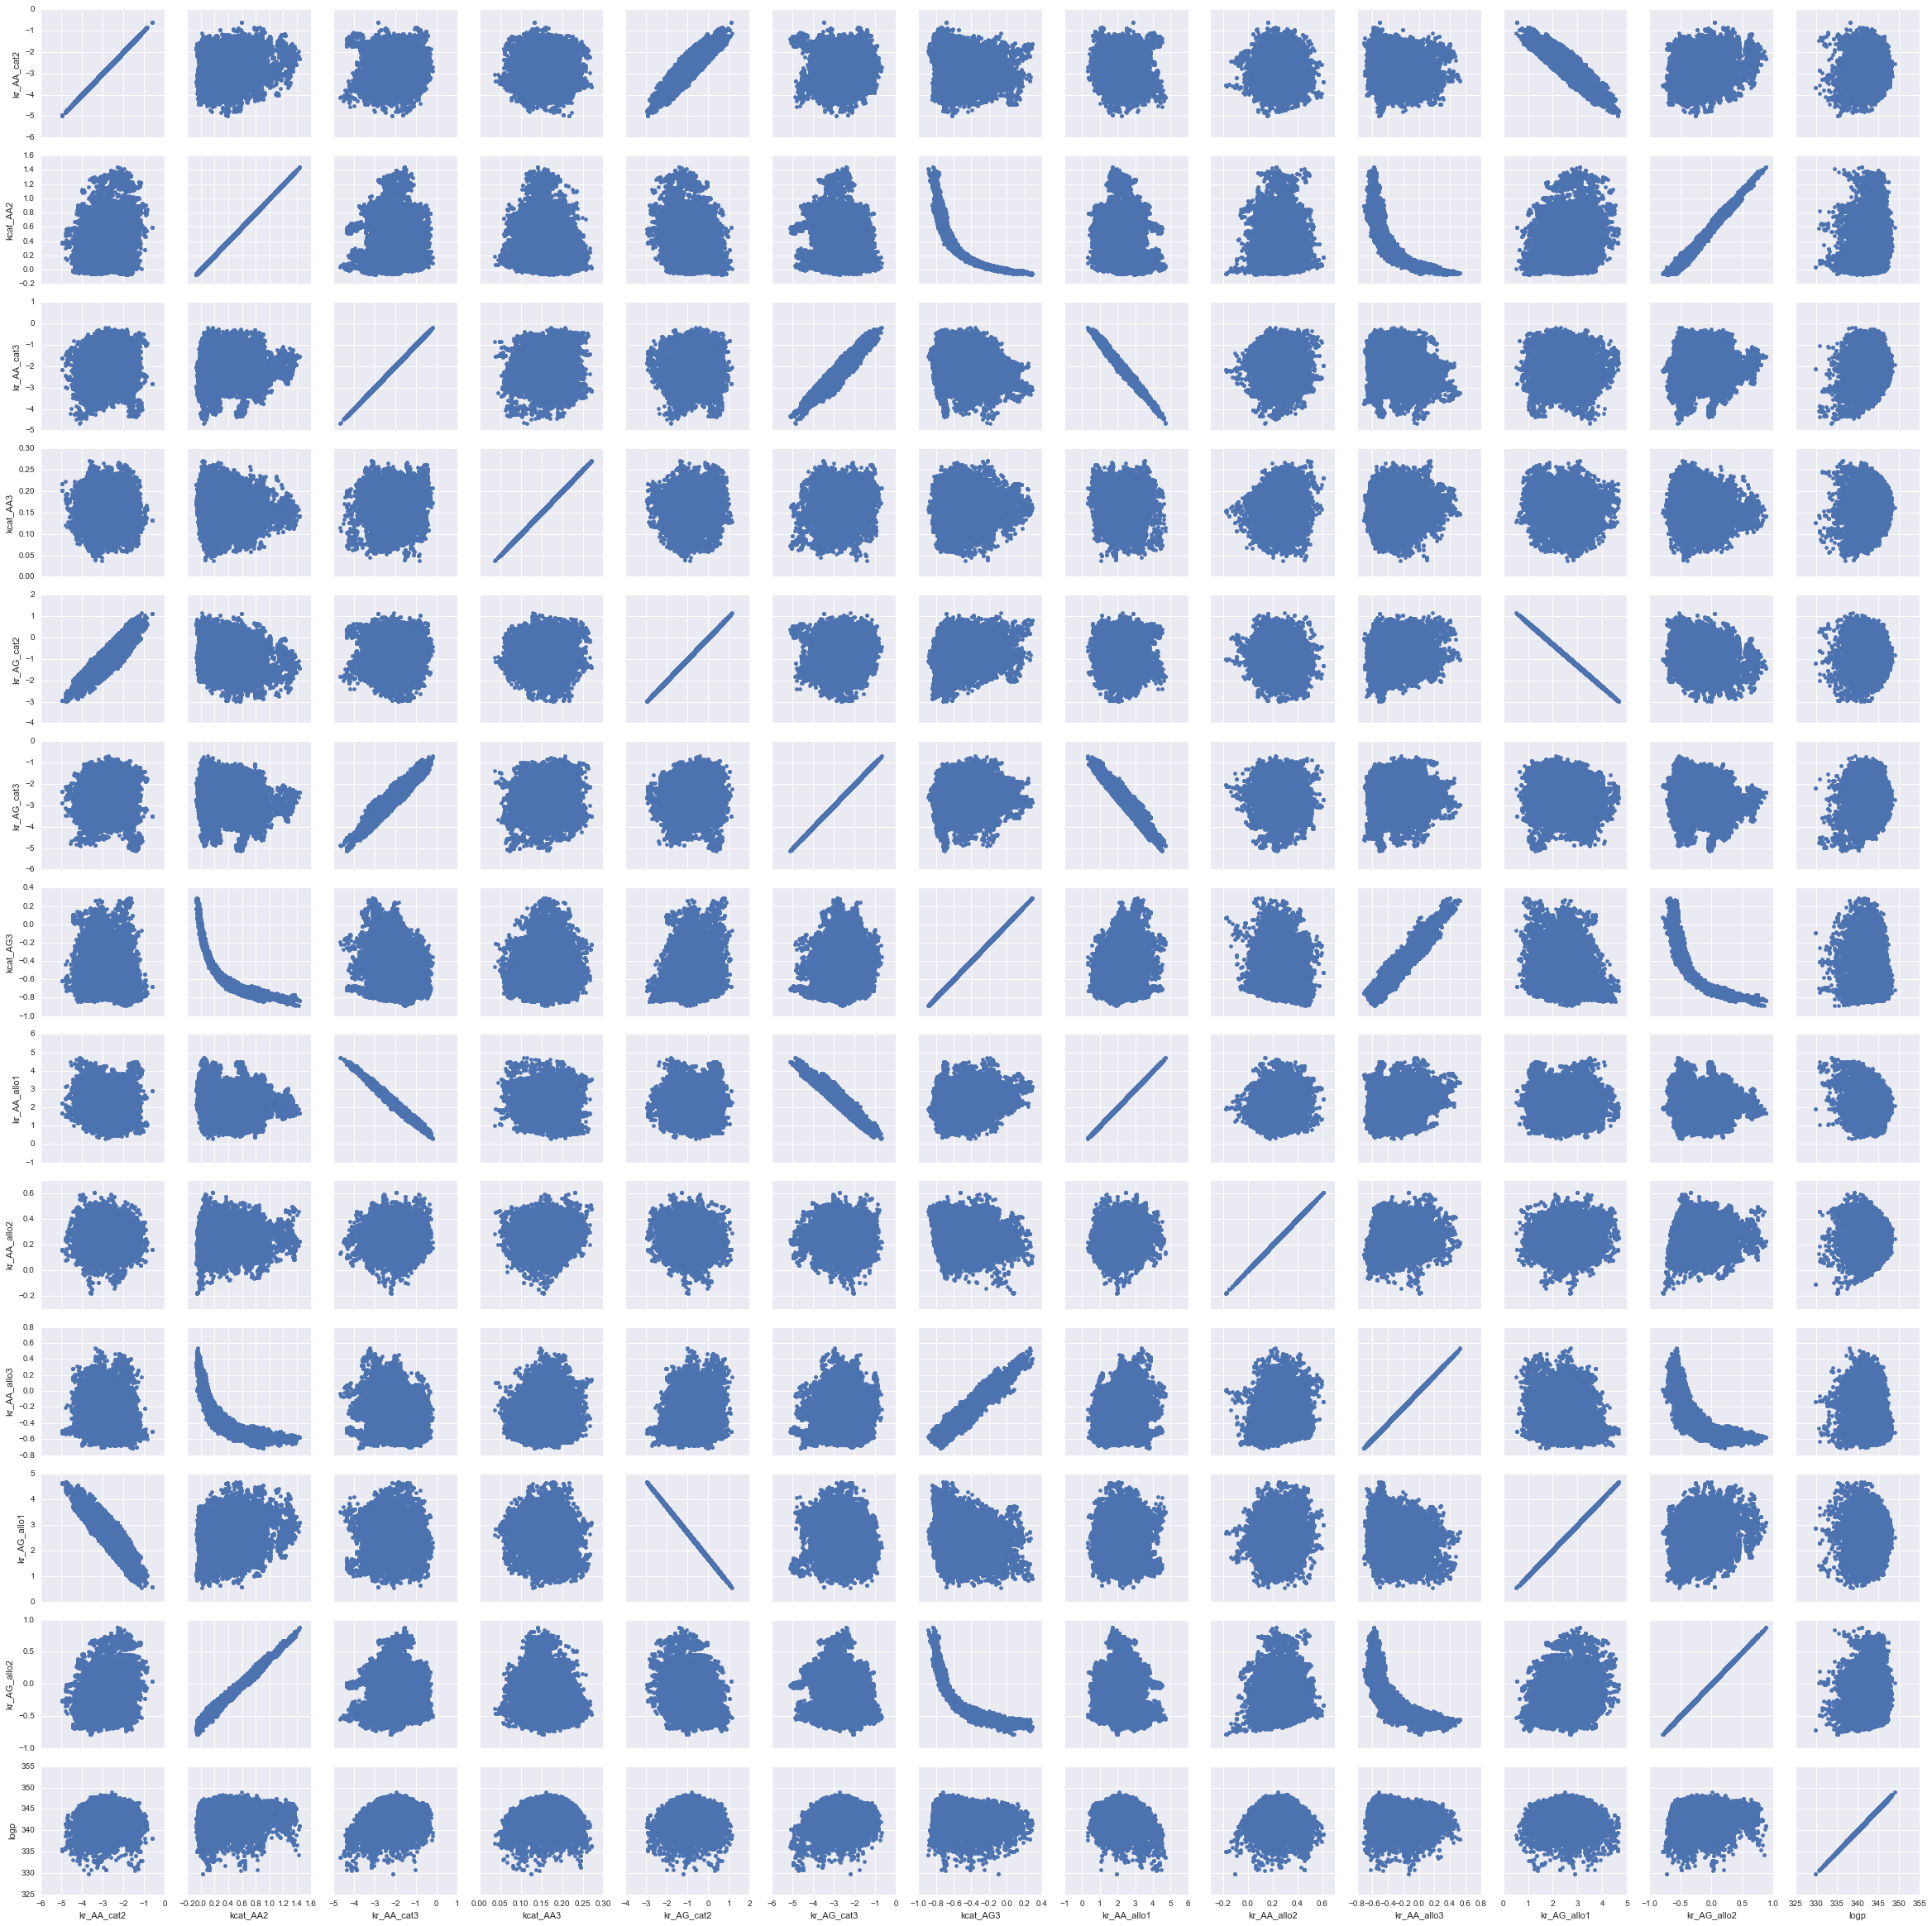

In [23]:
g = sns.PairGrid(mcmc_samples.sample(frac=.10))
g.map(plt.scatter)

In [24]:
float(38644.0/255000)*100

15.154509803921567

In [33]:
float(36666.0/350000)*100

10.476

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata

In [35]:
test_points = np.squeeze(np.dstack((mcmc_samples['kcat_AA2'].values, mcmc_samples['kcat_AG3'].values, mcmc_samples['kr_AA_allo1'])))

In [64]:
len(test_points)

255000

In [36]:
from scipy.spatial import ConvexHull

In [37]:
hull = ConvexHull(test_points)

In [38]:
hull.simplices

array([[114397, 230878,  27213],
       [ 10038, 230878,  27213],
       [161893, 134841, 161569],
       [161893, 134841,  20306],
       [221560, 134841, 221571],
       [221560, 134841,  20306],
       [ 20382, 117622, 194629],
       [ 20382, 161893,  20306],
       [ 20382, 161893, 117622],
       [ 20382, 221560,  20306],
       [105336,  13937, 100092],
       [114133, 114397, 114122],
       [114407, 114397, 230878],
       [161841, 162645,   9833],
       [162323, 161517, 161569],
       [162323, 161841, 161569],
       [162323, 161841, 162645],
       [236391,  10038, 230878],
       [236391, 162645,   9833],
       [ 10344,  27398,   9833],
       [ 10344,  10401,   9833],
       [ 10344,  10401, 194629],
       [ 10427,  10401,   9833],
       [ 10427,  10467, 117622],
       [ 10427, 117622, 194629],
       [ 10427,  10401, 194629],
       [161554, 161893, 161569],
       [161554, 161893, 117622],
       [161554, 161841, 161569],
       [161554,  10467, 117622],
       [16

In [43]:
def tri_vec_from_pts(pt1, pt2, pt3):
    v12 = pt2 - pt1
    v13 = pt3 - pt1
    v23 = pt3 - pt2
    
    return v12, v13, v23

def tri_edge_length(v12, v13, v23):
    l13 = np.sqrt(v13[0]**2 + v13[1]**2)
    l12 = np.sqrt(v12[0]**2 + v13[1]**2)
    l23 = np.sqrt(v23[0]**2 + v23[1]**2)
    
    return l12, l13, l23

def return_tri_pts_from_indx(i1, i2, i3, points):
    return points[i1], points[i2], points[i3]

In [58]:
def calc_new_simplices(old_simplices, points, max_feature_length=1):
    n = 0
    new_simplices = old_simplices
    for idx, simplice in enumerate(old_simplices):
        pt1, pt2, pt3 = return_tri_pts_from_indx(simplice[0], simplice[1], simplice[2], points)
        v12, v13, v23 = tri_vec_from_pts(pt1, pt2, pt3)
        l12, l13, l23 = tri_edge_length(v12, v13, v23)
        if np.any(np.array([l12, l13, l23]) > max_feature_length):
            n += 1
            new_simplices = np.delete(new_simplices, idx, axis=0)
    print 'Removed ',n,' simplices of ',len(old_simplices),'.'
    return new_simplices

250151 255000


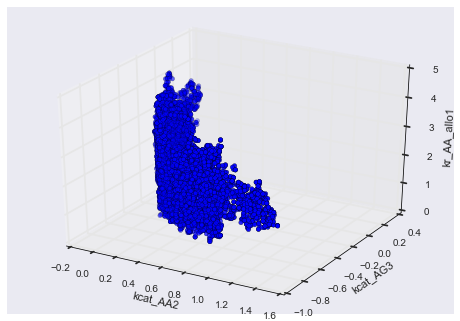

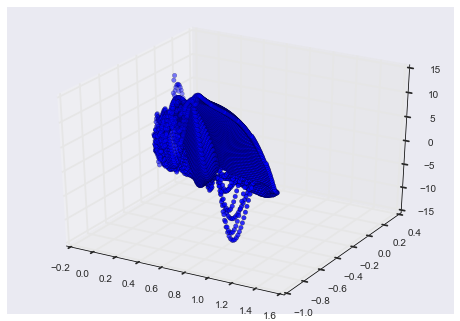

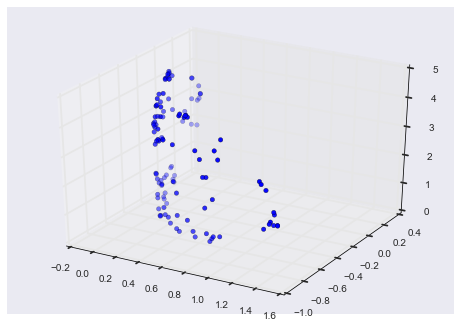

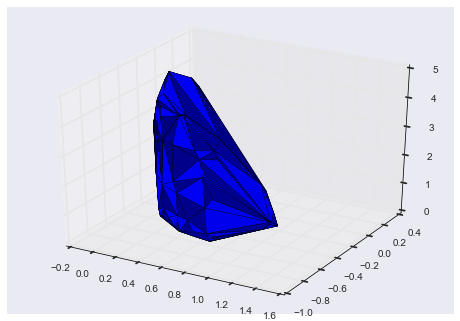

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mcmc_samples_subsampled['kcat_AA2'], mcmc_samples_subsampled['kcat_AG3'], mcmc_samples_subsampled['kr_AA_allo1'])
ax.set_xlabel('kcat_AA2')
ax.set_ylabel('kcat_AG3')
ax.set_zlabel('kr_AA_allo1')
hull_points = test_points[hull.vertices]
x1 = np.linspace(hull_points[:,0].min(), hull_points[:,0].max(), len(hull_points))
y1 = np.linspace(hull_points[:,1].min(), hull_points[:,1].max(), len(hull_points))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((hull_points[:,0], hull_points[:,1]), hull_points[:,2], (x2, y2), method='cubic')
#ax.plot_surface(x2, y2, z2)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x2, y2, z2)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(hull_points[:,0], hull_points[:,1], hull_points[:,2])
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
print hull.simplices.max(), len(test_points[:,0])
ax4.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=hull.simplices)

In [53]:
new_simplices = calc_new_simplices(hull.simplices, test_points)

Removed simplice at point idx:  [114397 230878  27213]  with lengths:  0.609082555523 0.753794922752 1.03221771314
Removed simplice at point idx:  [ 10038 230878  27213]  with lengths:  0.975633091083 0.326458764874 1.03221771314
Removed simplice at point idx:  [161893 134841  20306]  with lengths:  0.885024343533 1.51383138123 0.974417500551
Removed simplice at point idx:  [ 20382 161893  20306]  with lengths:  1.39857089475 0.0640609252571 1.51383138123
Removed simplice at point idx:  [ 20382 161893 117622]  with lengths:  1.43446565592 0.325780104434 1.77303976346
Removed simplice at point idx:  [161841 162645   9833]  with lengths:  1.04289225922 1.76599902853 1.73500618006
Removed simplice at point idx:  [236391  10038 230878]  with lengths:  1.28736441636 0.370066310025 1.27533513779
Removed simplice at point idx:  [236391 162645   9833]  with lengths:  1.07919219772 1.70978639738 1.73500618006
Removed simplice at point idx:  [161554 161893 117622]  with lengths:  1.06365362115 1

In [49]:
len(new_simplices)

225

In [55]:
tri = tri.Triangulation(test_points[:,0], test_points[:,1])

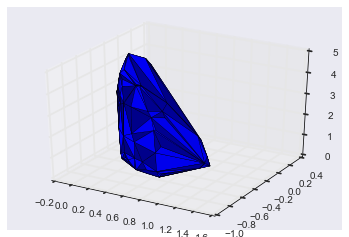

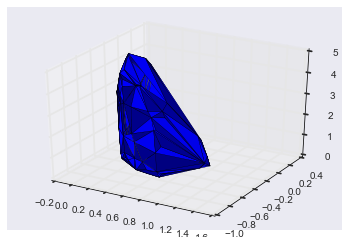

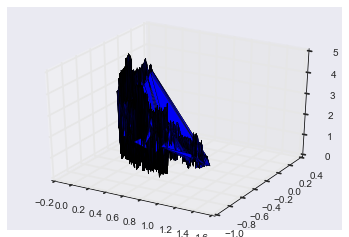

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=hull.simplices)
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=new_simplices)
fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
ax3.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2])

Removed  34  simplices of  240 .
Removed  17  simplices of  240 .


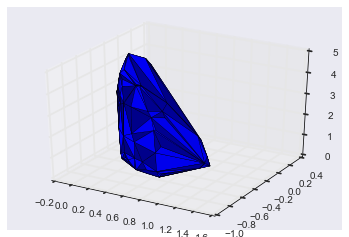

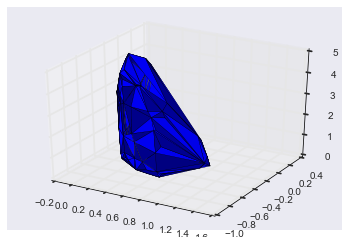

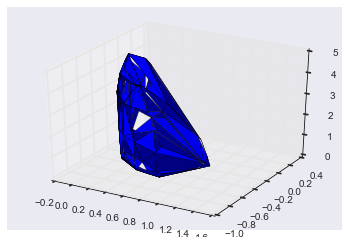

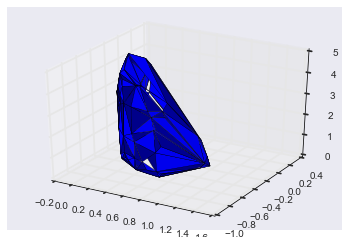

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=hull.simplices)
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=new_simplices)
new_simplices2 = calc_new_simplices(hull.simplices, test_points, max_feature_length=.5)
new_simplices3 = calc_new_simplices(hull.simplices, test_points, max_feature_length=.75)
fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
ax3.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=new_simplices2)
fig = plt.figure()
ax4 = fig.add_subplot(111, projection='3d')
ax4.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=new_simplices3)

In [66]:
test_unique = np.squeeze(np.dstack((unique_samples['kcat_AA2'].values, unique_samples['kcat_AG3'].values, unique_samples['kr_AA_allo1'])))

In [69]:
test_unique

array([[ 0.42077731, -0.67736864,  2.34906683],
       [ 0.42073503, -0.66792528,  2.37753207],
       [ 0.41592717, -0.65328784,  2.37780635],
       ..., 
       [ 0.02494651, -0.14819994,  2.22499476],
       [ 0.01005426, -0.11026223,  2.27721363],
       [ 0.0183955 , -0.10933837,  2.27701519]])